Kaggle Dataset used from "Tweets and Engagement Metrics", https://data.world/kjensen18

In [558]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go

In [559]:
# Planned EDA of dataset
# Create Sentiment analysis model

In [560]:
df = pd.read_csv("tweets-engagement-metrics.csv")

In [561]:
df.shape

(102062, 20)

In [562]:
df.columns

Index(['Unnamed: 0', 'UserID', 'Gender', 'LocationID', 'City', 'State',
       'StateCode', 'Country', 'TweetID', 'Hour', 'Day', 'Weekday',
       'IsReshare', 'Reach', 'RetweetCount', 'Likes', 'Klout', 'Sentiment',
       'Lang', 'text'],
      dtype='object')

Data Cleaning

In [563]:
# Removing the Unnamed: 0 column from the data frame
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [564]:
df.head()

UserID   Gender  LocationID     City    State StateCode  Country  \
0  tw-1267804344  Unknown         1.0  Elbasan  Elbasan        AL  Albania   
1    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
2    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
3    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
4    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   

                 TweetID  Hour  Day   Weekday  IsReshare  Reach  RetweetCount  \
0  tw-698155297102295041     7   12    Friday       True  339.0         127.0   
1  tw-685159757209059329    11    7  Thursday      False   87.0           0.0   
2  tw-686907710311378944     6   12   Tuesday      False   87.0           0.0   
3  tw-686968158050201600    10   12   Tuesday      False   87.0           0.0   
4  tw-690210449674092545     9   21  Thursday      False   85.0           0.0   

   Likes  Klout  Sentiment Lang  \
0    0.0   44.0        0.0   en   
1    0.0   22.0        0.0   en   
2    0.0   22.0        0.0   en   
3    0.0   22.0        0.0   en   
4    0.0   21.0        0.0   en   

                                                text  
0  "RT @AdrianRusso82: Our Innovation Lab is offi...  
1  Now Open  AWS Asia Pacific (Seoul) Region via ...  
2  A Beginner's Guide to Scaling to 11 Million+ U...  
3  Bridging AWS and Azure environments via VPN vi...  
4  ELK on AWS ElasticSearch Service + ElasticBean...

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102062 entries, 0 to 102061
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        102062 non-null  object 
 1   Gender        102062 non-null  object 
 2   LocationID    102062 non-null  float64
 3   City          99783 non-null   object 
 4   State         100165 non-null  object 
 5   StateCode     100336 non-null  object 
 6   Country       102062 non-null  object 
 7   TweetID       102062 non-null  object 
 8   Hour          102062 non-null  int64  
 9   Day           102062 non-null  int64  
 10  Weekday       102062 non-null  object 
 11  IsReshare     102062 non-null  bool   
 12  Reach         102062 non-null  float64
 13  RetweetCount  102062 non-null  float64
 14  Likes         102062 non-null  float64
 15  Klout         102062 non-null  float64
 16  Sentiment     102062 non-null  float64
 17  Lang          102062 non-null  object 
 18  text

In [566]:
df.isnull().sum()

UserID             0
Gender             0
LocationID         0
City            2279
State           1897
StateCode       1726
Country            0
TweetID            0
Hour               0
Day                0
Weekday            0
IsReshare          0
Reach              0
RetweetCount       0
Likes              0
Klout              0
Sentiment          0
Lang               0
text               0
dtype: int64

In [567]:
df.describe().T

count         mean           std  min     25%     50%  \
LocationID    102062.0  2836.207687   1330.294460  1.0  1601.0  3738.0   
Hour          102062.0    11.416149      6.062294  0.0     7.0    11.0   
Day           102062.0    15.898709      8.401409  1.0     9.0    16.0   
Reach         102062.0  8426.389254  87777.617341  0.0   152.0   454.0   
RetweetCount  102062.0     7.986449     96.914644  0.0     0.0     0.0   
Likes         102062.0     0.149684      2.557491  0.0     0.0     0.0   
Klout         102062.0    40.409986     13.652028  0.0    32.0    43.0   
Sentiment     102062.0     0.380754      1.046501 -6.0     0.0     0.0   

                 75%           max  
LocationID    3774.0  6.289000e+03  
Hour            16.0  2.300000e+01  
Day             23.0  3.100000e+01  
Reach         1519.0  1.034245e+07  
RetweetCount     3.0  2.612700e+04  
Likes            0.0  1.330000e+02  
Klout           49.0  9.900000e+01  
Sentiment        0.6  7.333333e+00

**Data Analysis of Twitter/X Engagement**

In [568]:
df.head()

UserID   Gender  LocationID     City    State StateCode  Country  \
0  tw-1267804344  Unknown         1.0  Elbasan  Elbasan        AL  Albania   
1    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
2    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
3    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
4    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   

                 TweetID  Hour  Day   Weekday  IsReshare  Reach  RetweetCount  \
0  tw-698155297102295041     7   12    Friday       True  339.0         127.0   
1  tw-685159757209059329    11    7  Thursday      False   87.0           0.0   
2  tw-686907710311378944     6   12   Tuesday      False   87.0           0.0   
3  tw-686968158050201600    10   12   Tuesday      False   87.0           0.0   
4  tw-690210449674092545     9   21  Thursday      False   85.0           0.0   

   Likes  Klout  Sentiment Lang  \
0    0.0   44.0        0.0   en   
1    0.0   22.0        0.0   en   
2    0.0   22.0        0.0   en   
3    0.0   22.0        0.0   en   
4    0.0   21.0        0.0   en   

                                                text  
0  "RT @AdrianRusso82: Our Innovation Lab is offi...  
1  Now Open  AWS Asia Pacific (Seoul) Region via ...  
2  A Beginner's Guide to Scaling to 11 Million+ U...  
3  Bridging AWS and Azure environments via VPN vi...  
4  ELK on AWS ElasticSearch Service + ElasticBean...

Day of the Week with the most Tweets

In [569]:
fig = px.histogram(x = 'Weekday',data_frame=df, category_orders= {'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}, title='User Engagement by Day')
fig.update_layout(width=900, height=500)
fig.show()

Days that had the most tweets to be posted were Tuesday, Wednesday, and Thursday. Saturday and Sunday are shown to be the days with the least amount of tweets.

Hours of High Activity on Twitter

In [570]:
# best to use method for integer type columns than object or if not looking for just overall count on the side

hour_count = df.groupby('Hour')['UserID'].count().reset_index() # by grouping by hour, find the total number of occurrances of active users in UserID
hour_count['UserCount']=hour_count['UserID'] # replacing the name of UserID to UserCount to better identify
fig = px.line(hour_count, x='Hour', y='UserCount', title='Distribution of User Engagement by Hour')
fig.update_layout(width=900, height=500)
fig.show()

Starting from 0 to 23, users tend to be most active on Twitter around 10 to 11 am. Then reaching a steady decline throughout the rest of the day.

Percentage of Different Genders that use Twitter

In [571]:
gender_count = df['Gender'].value_counts()

# gender_percentages = df['Gender'].value_counts(normalize=True) * 100 
# show the percentage of each gender that uses Twitter

print(gender_count)
print(gender_count.index)


Male       52603
Unknown    30003
Female     10087
Unisex      9369
Name: Gender, dtype: int64
Index(['Male', 'Unknown', 'Female', 'Unisex'], dtype='object')


In [572]:
# plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)

fig = px.pie(names=gender_count.index, values=gender_count, title='Distribution of Gender Frequency on Twitter')
fig.update_traces(textinfo='percent+label', pull=[0, 0])  # pull used for adjusting gap between slices
fig.update_layout(width=800, height=500)
fig.show()

Based on the pie chart above, around 51 percent of users on Twitter are male or stated to be in their account information while around 10 percent of users are female and around 9 percent are unisex. If the gender is unknown, it was most likely due to users deciding not to provide their gender in their account information. 

What Percentage of Tweets are Reshared/retweeted?

In [573]:
tweets_count = df['IsReshare'].value_counts()

fig = px.pie(names=tweets_count.index, values=tweets_count, title='Distribution of Retweeted Posts on Twitter')
fig.update_traces(textinfo='percent+label', pull=[0, 0]) 
fig.update_layout(width=800, height=500)
fig.show()

From the chart above, if an post is reshared then it is "true". Around 36 percent of posts on Twitter are reshared posts while around 65 percent of posts are not reshared and are original posts.

Most Common Language on Twitter

In [574]:
user_per_language = df.groupby('Lang')['UserID'].count().reset_index()
user_per_language['User Count'] = user_per_language['UserID']
fig = px.histogram(user_per_language, x='Lang', y='User Count')
fig.update_xaxes(tickangle=0)
fig.update_layout(width=800, height=600, xaxis={'categoryorder':'total descending'})
fig.show()

Large portion of tweets are shown to be English in the chart above. Connecting well with most users being in locations such as the United States and the United Kingdom.

Distribution of User Engagement Worldwide

In [575]:
user_per_country = df.groupby('Country')['UserID'].count().reset_index()

fig = px.scatter_geo(user_per_country, 
                     locations='Country', 
                     locationmode='country names', 
                     size='UserID', 
                     hover_name='Country', 
                     title='User Distribution Worldwide', 
                     projection='natural earth', 
                     color_continuous_scale='Viridis',
                     size_max=40)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")
fig.update_layout(width=800, height=500)
fig.show()

Based on the geo map above, we can see that a large amount of user engagement coming from countries such as United States and the United Kingdom.

Klout and User Sentiment Analysis

In [576]:
# Klout is the popularity of a post, maybe connect to the snetiment it obtains with the popularity 
fig = px.scatter(df, x='Sentiment', y='Klout', title='Connection Between Klout and Sentiment')
fig.update_layout(width=800, height=500)
fig.show()

Sentiment can be seen as the public opinion to a post and Klout as the popularity of a post. Understanding the idea of Sentiment as a positive, negative, and neutral view. The lower the sentiment meaning the lower the opinion of a post and vice versa.

Reach of a Post and Connection to Likes

In [577]:
fig = px.scatter(df, x='Reach', y='Likes', color='RetweetCount', title='Reach vs Likes')
fig.update_layout(width=800, height=500)
fig.show()

The plot shows the connection between Likes and Reach. Other than a few outliers, it can be seen that most likes can reach around up to a Reach of 500k. When aiming to see the affect of retweets based on the Klout or sentiment regarding a post, it is seen to be quite low interestingly.

Overall User Sentiment

In [578]:
# Overall if the mood is positive, negative, or neutral
def get_mood(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Mood'] = df['Sentiment'].apply(get_mood)
mood_count = df.groupby('Mood')['Likes'].sum().reset_index()
fig = px.histogram(mood_count, x='Mood', y='Likes', color='Mood', title='Trend of Likes to the Mood of a Post')
fig.update_layout(width=800, height=500)
fig.show()

Connection of RetweetCount and Klout

<Figure size 1000x800 with 0 Axes>

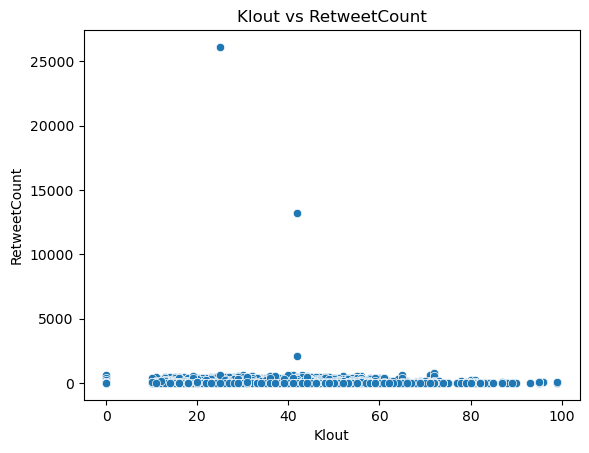

<Figure size 1000x800 with 0 Axes>

In [579]:
sns.scatterplot(df, x='Klout', y='RetweetCount')
plt.title("Klout vs RetweetCount")
plt.figure(figsize=(10,8))
# Created in Seaborn as the plot became very delayed from the load of all the points on the plot

Other than a few outliers, if a post became very popular based on Klout it does not affect the number of Retweets that would come from a trending post.

**Sentiment Analysis using Multi-Class Classification**

In [580]:
# Models to consider: Logistic Regression (Beginner Friendly and can cover mood) and Naive Bayes (useful in text classification, namely Sentiment Analysis for this) and Linear Regression (Numeric Outcome such as Likes and RetweetCount)

# Will be great to use for classification and good for going off the basis of mood column.

In [581]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [582]:
df['label'] = df['Mood'].astype('category').cat.codes # cat.codes is a pandas method to convert categories into numerical codes

In [583]:
# focus english text
df = df[df['Lang'] == 'en']

In [584]:
def convert_lowerCase(x):
    return x.lower()

In [585]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(convert_lowerCase)
# Desire to ensure the column is a string then proceeding to convert all text to lowercase

In [586]:
# Access the mapping between numerical labels and mood categories
label_mapping = dict(enumerate(df['Mood'].astype('category').cat.categories))

# Print the mapping
print("Label Mapping:")
for label, mood in label_mapping.items():
    print(f"{label}: {mood}")

Label Mapping:
0: Negative
1: Neutral
2: Positive


In [587]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=100)

In [588]:
cv = CountVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = cv.fit_transform(X_train)
X_test_vectorized = cv.transform(X_test)

In [589]:
# train logistic regression
log_regression = LogisticRegression(max_iter=2000)
log_regression.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=2000)

In [590]:
y_pred = log_regression.predict(X_test_vectorized)

In [591]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.92
Confusion Matrix:
[[  795   351   117]
 [  100 15065   446]
 [   80   811  5626]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.63      0.71      1263
           1       0.93      0.97      0.95     15611
           2       0.91      0.86      0.89      6517

    accuracy                           0.92     23391
   macro avg       0.88      0.82      0.85     23391
weighted avg       0.92      0.92      0.92     23391



Based on the Logistic Regression model, it seems to be able to accurately classify a text and user sentiment towards it with 92% overall accuracy.

Testing the Model

In [593]:
# Extract a specific example for testing
example_index = 1000
test_text = X_test.iloc[example_index]
actual_label = y_test.iloc[example_index]

# Make a prediction for the specific example
predicted_label = log_regression.predict(cv.transform([test_text]))

classes = ['Neutral', 'Positive', 'Negative']

print(f"\nExample Text: {test_text} \nActual Label: {label_mapping[actual_label]} \nPredicted Label: {label_mapping[predicted_label[0]]}")


Example Text: oracle cloud svp shawn price says suites win in cloud computing war with aws and microsoft azure - computerworlduk http://www.computerworlduk.com/cloud-computing/oracle-cloud-svp-says-suites-win-in-cloud-computing-war-with-aws-azure-3634663/ 
Actual Label: Positive 
Predicted Label: Positive


The Mood of the tweet has been successfuly predicted!